# Neural Network Classification with PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options).

[Book Version of the video](https://www.learnpytorch.io/02_pytorch_classification/) - Read until architecture from here.

# 1. Make Classification data and get it ready

In [ ]:
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


We have two features of X that relate to one feature of y, the value of y is either is 0 or 1 , hence we have binary classification problem.

In [ ]:
# Make a dataframe of circle data

# There is no specific way to do data exploration , just do what works for u !

import pandas as pd
circles = pd.DataFrame({"X1" : X[:, 0],
                        "X2" : X[:, 1],
                        "label" : y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
circles.label.value_counts()

,count
label,
1,500
0,500


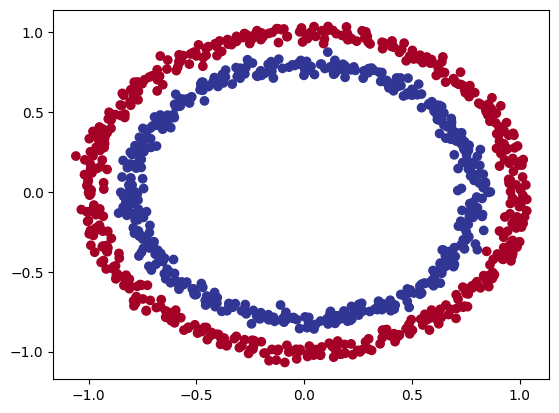

In [ ]:
# Visualise , Visualise , Visualise

import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

**Note** : The data we're working with is often reffered to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

The problem statement that we are working with is , given inputs X1 and X2 we try to predict if the point falls in the red category or the blue.

## 1.1 Check the input and output shapes

We can right into errors related to the shape of our tensors , so get aquainted with their shapes when u work on a problem.

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shape for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shape for one sample of X: (2,) and the same for y: ()


## 1.2 Turn data into tensors and create train and test splits

In [ ]:
import torch
torch.__version__

'2.4.1+cu121'

In [ ]:
type(X)

numpy.ndarray

In [ ]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float) # Specify the type here because , numpy arrays are of type float64 by default , if we don't mention type here
# Then we end up getting tensors of type float 64 which can lead to errors,
# Now, upon using "type(torch.float)", we get tensors of type float 32
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X) , X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
# Split data into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, #0.2 = 20% of data will be test and 80% will train
                                                    random_state=42) # train_test_split, generates the train test split at random ,
                                                                     # using the random_state is like what what we did with RANDOM SEED in PyTorch
                                                                     # So essentially we get the same train test split every time we run this cell

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

# 2. Building a model

Let's build  a model to classify our blue and red dots

To do so , we want to:
1. Setup device agnostic code so our code will run on an accelerator(GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define loss function and optimizer
4. Create aa training and test loop

In [ ]:
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Now we've setup device agnostic code, let's create a model that :

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are  capable of handling the shapes of our data
3. Define a `forward()`  method that outlines the forward pass (or forward computation) of the model.
4. Instantiate an instance of our model class and send it to the target device

In [ ]:
#1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear() layers that are capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # Takes in 2 features and upscales it to 5
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same features as y)

  # 3. Define forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer1 -> layer2 -> output

# 4. Instantiate an instance of our model class and send it to the target device

model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
device # target devie

'cpu'

In [ ]:
next(model_0.parameters()).device #This code checks and returns the device (CPU or GPU) where the first parameter of the model `model_0` is stored.

device(type='cpu')

**Note :**

You can use [Tensorflow playground](https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=5&seed=0.21946&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) to visualise ur neural network

## Replicating the above model using `nn.Sequential()`

In [ ]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

The only difference is that the class `CircleModelV0` inherits the `nn.Module` class of PyTorch because of which we had to override the `forward()` method , this made our model slightly more complex, however we can subclass the `nn.Module` in case of complex problem statements. In cases when we are building a straightforward neural network we use `nn.Sequential()`

In [ ]:
# we could also do

#1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear() layers that are capable of handling the shapes of our data
    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    ).to(device)
  # 3. Define forward() method that outlines the forward pass
  def forward(self, x):
    return self.two_linear_layers(x)

# 4. Instantiate an instance of our model class and send it to the target device

torch.manual_seed(42)
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [ ]:
model_0.state_dict()

OrderedDict([('two_linear_layers.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]])),
             ('two_linear_layers.0.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
             ('two_linear_layers.1.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
             ('two_linear_layers.1.bias', tensor([-0.2060]))])

## Make Predictions



In [ ]:
with torch.inference_mode():
  untrained_pred = model_0(X_test.to(device))
print(f"Length of predictions : {len(untrained_pred)}, Shape: {untrained_pred.shape}")
print(f"Length of test sample : {len(X_test)}, shape: {X_test.shape}")
print(f"\n first 10 predictions:\n {torch.round(untrained_pred[:10])}")
print(f"\n first 10 labels:\n {y_test[:10]}")

Length of predictions : 200, Shape: torch.Size([200, 1])
Length of test sample : 200, shape: torch.Size([200, 2])

 first 10 predictions:
 tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.]])

 first 10 labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## 2.1 Setup loss function and optimizer

**Which loss function should you use ?**

Again ... this is problem specific.

For example for regression you might want MAE or MSE ( mean absolute error or Mean Squared Error )

For classification problems , you might want binary cross entropy or categorical cross entropy.

**Which optimizer should you use ?**

And for optimizers, two of the mode common and useful are SGD and Adam, however PyTorch has many built in options

* For some common choices of loss functions and optimizers - [Optimizers and loss function ](https://www.learnpytorch.io/02_pytorch_classification/#21-setup-loss-function-and-optimizer)
* For the loss function we're going to use `torch.nn.BCEWithLogitsLoss()`, for more info on binary cross entropy(BCE), check out this article - [article on BCE](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a)

* For definition on what a logit is in deep learning - [logit explained](https://stackoverflow.com/a/52111173/7900723)

* For different optimizers see `torch.optim`


In [ ]:
# Setup the loss function
# loss_function = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to BCE loss
# BCE loss with with logits basically combines the sigmoid activation function and the BCE loss ,
# This version is mathematically more stable than using BCELoss in combination with a sigmoid activation function
# Read doc for BCEWithLogitLoss() in pytorch for more info

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.1)

In [ ]:
# Calculate the accuracy - out of 100 examples , what percentage does our model get right ?

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

# 3. Train Model


To train our model , we're going to need to build a training loop:

1. Forward pass
2. Calculate the loss
3. Optimzer zero grad
4. Loss backward ( backpropagation )
5. Optimizer step ( gradient descent )

## 3.1 Going from raw logits -> prediction probabilites -> prediction labels

Our model outputs are going to be raw **logits**

We can convert these logits into prediction probabilites by passing them through to some kind of activation function (e.g sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilites into prediction labels by either rounding (binary classification) them or taking the `argmax()`(multiclass classification).

In [ ]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667]])

logits are the raw outputs of our model , i.e without being passed through any activation function.

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]])

For our prediction probability values, we need to perform a range-style rounding on them :
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` <  0.5, `y=0` (class 0)

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# in full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

## 3.2 Building a training and testing loop

In [ ]:
device

'cpu'

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 100

# put data to target device, this makes our code device agnostic
X_train , y_train = X_train.to(device), y_train.to(device)

X_test, y_test = X_test.to(device), y_test.to(device)

# Building training and evaluation loop
for epoch in range(epochs):
  ## Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # Turn logits -> pred probs -> pred labels

  # 2. Calculate loss / accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilites as input
  #                y_train)
  loss = loss_fn(y_logits,  # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # O3. ptimizer zero grad
  optimizer.zero_grad()

  # 4. loss backward
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1.  Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the test loss / acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

    # Print out what is happening
    if epoch % 10 == 0:
      print(f"Epoch : {epoch} | Loss : {loss:.5f}%, Acc: {acc:.2f}% | Test loss : {test_loss:.5f}% | Test Acc: {test_acc:.2f}%")


Epoch : 0 | Loss : 0.69569%, Acc: 50.00% | Test loss : 0.69721% | Test Acc: 50.00%
Epoch : 10 | Loss : 0.69403%, Acc: 50.00% | Test loss : 0.69615% | Test Acc: 50.00%
Epoch : 20 | Loss : 0.69343%, Acc: 46.00% | Test loss : 0.69585% | Test Acc: 48.50%
Epoch : 30 | Loss : 0.69321%, Acc: 49.00% | Test loss : 0.69577% | Test Acc: 47.50%
Epoch : 40 | Loss : 0.69312%, Acc: 49.50% | Test loss : 0.69573% | Test Acc: 46.50%
Epoch : 50 | Loss : 0.69308%, Acc: 50.38% | Test loss : 0.69569% | Test Acc: 46.50%
Epoch : 60 | Loss : 0.69306%, Acc: 50.50% | Test loss : 0.69564% | Test Acc: 46.50%
Epoch : 70 | Loss : 0.69305%, Acc: 50.50% | Test loss : 0.69559% | Test Acc: 46.50%
Epoch : 80 | Loss : 0.69304%, Acc: 50.75% | Test loss : 0.69553% | Test Acc: 46.50%
Epoch : 90 | Loss : 0.69303%, Acc: 50.38% | Test loss : 0.69547% | Test Acc: 46.50%


# 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything , so to inspect this let's make some predictions and make them visual !

In other words "visualize, visualize , visualize!"

To do so , we are going to import a function called `plot_decision_boundary()`

In [ ]:
import requests
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
  """Plots decision boundaries of model predicting on X in comparison to y.

  Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
  """
  # Put everything to CPU (works better with NumPy + Matplotlib)
  model.to("cpu")
  X, y = X.to("cpu"), y.to("cpu")

  # Setup prediction boundaries and grid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

  # Make features
  X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

  # Make predictions
  model.eval()
  with torch.inference_mode():
    y_logits = model(X_to_pred_on)

  # Test for multi-class or binary and adjust logits to prediction labels
  if len(torch.unique(y)) > 2:
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
  else:
    y_pred = torch.round(torch.sigmoid(y_logits))  # binary

  # Reshape preds and plot
  y_pred = y_pred.reshape(xx.shape).detach().numpy()
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):
  """
  Plots linear training data and test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
  # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

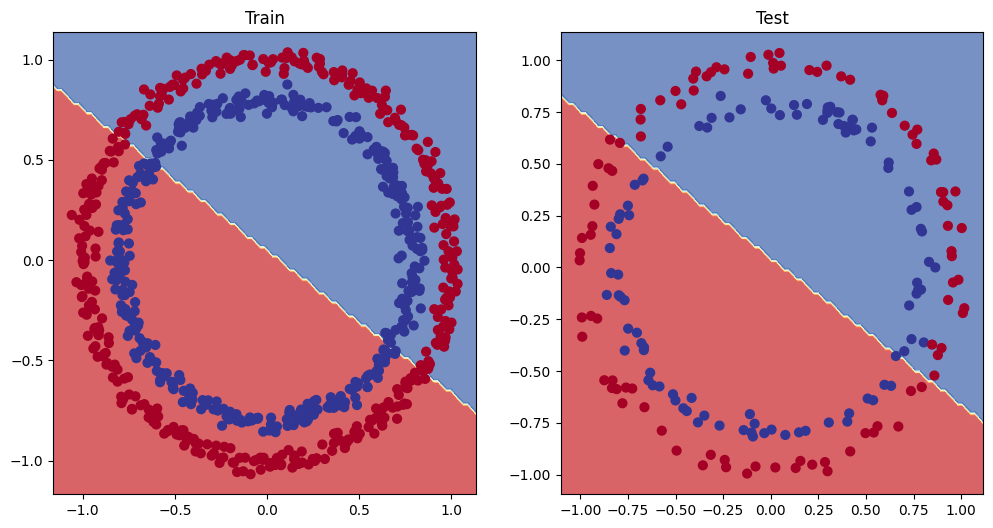

In [ ]:
# Plot the decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

The model we built is drawing a line , such that the data is divided inhalf , no wonder the accuracy was so low.


```
self.two_linear_layers = nn.Sequential(
  nn.Linear(in_features=2, out_features=5),
  nn.Linear(in_features=5, out_features=1)
).to(device)
```
This is probably because we only included linear layers in our model.


# 5. Improving a model (from a model perspective)
 * Add more layers - give the model more chances to learn about patterns in the data
 * Add more hidden layers - go from 5 hidden units to 10 hidden units
 * Fit for longer
 * Changing the activation functions
 * Changing the learning rate ( can lead to exploding gradient problem when it's too large, vanishing gradient problem when too low ).
 * Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.
And because the options are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**.

We can also make better predictions by having better data i.e from a data perspective.


Let's try and improve our model by:
* Adding more hidden units : 5 -> 10
* Increase the number of layers 2 -> 3
* Increase the number of epochs : 100 -> 200



Generally in machine learning we change one parameter at a time not all at

---

once like we are about to do. This is known as **Experiment Tracking**.

In [ ]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    z = self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speed ups where possible behind the scenes
    # or
    # z = self.layer1(x)
    # z = self.layer2(z)
    # z = self.layer3(z)
    return z

model_1 = CircleModelV1().to(device) # device agnostic code
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Define the loss function

loss_fn = torch.nn.BCEWithLogitsLoss()

# Define the optimizer
optimizer = torch.optim.SGD(lr=0.01, params=model_1.parameters())

In [ ]:
# Write training loop and testing loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# put data on the target device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss & acc
  test_loss = loss_fn(y_pred,
                 y_train)

  train_acc = accuracy_fn(y_true = y_train,
                         y_pred=y_pred)

  # 3. optimizer Zero grad
  optimizer.zero_grad()

  # 4. Back prop
  test_loss.backward()

  # 5. optimizer step (gradient descent)
  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    train_loss = loss_fn(test_pred,
                  y_test)

    test_acc = accuracy_fn(y_true = y_test,
                         y_pred=test_pred)

  if epoch % 50 == 0:
    print(f"epoch : {epoch} | train loss {test_loss:.5f} | train acc : {train_acc:.2f}% | test loss : {train_loss:.5f} | test acc : {test_acc:.2f}%")



epoch : 0 | train loss 0.75769 | train acc : 50.88% | test loss : 0.75541 | test acc : 51.00%
epoch : 50 | train loss 0.75769 | train acc : 50.88% | test loss : 0.75541 | test acc : 51.00%
epoch : 100 | train loss 0.75769 | train acc : 50.88% | test loss : 0.75541 | test acc : 51.00%
epoch : 150 | train loss 0.75769 | train acc : 50.88% | test loss : 0.75541 | test acc : 51.00%
epoch : 200 | train loss 0.75769 | train acc : 50.88% | test loss : 0.75541 | test acc : 51.00%
epoch : 250 | train loss 0.75769 | train acc : 50.88% | test loss : 0.75541 | test acc : 51.00%
epoch : 300 | train loss 0.75769 | train acc : 50.88% | test loss : 0.75541 | test acc : 51.00%
epoch : 350 | train loss 0.75769 | train acc : 50.88% | test loss : 0.75541 | test acc : 51.00%
epoch : 400 | train loss 0.75769 | train acc : 50.88% | test loss : 0.75541 | test acc : 51.00%
epoch : 450 | train loss 0.75769 | train acc : 50.88% | test loss : 0.75541 | test acc : 51.00%
epoch : 500 | train loss 0.75769 | train ac

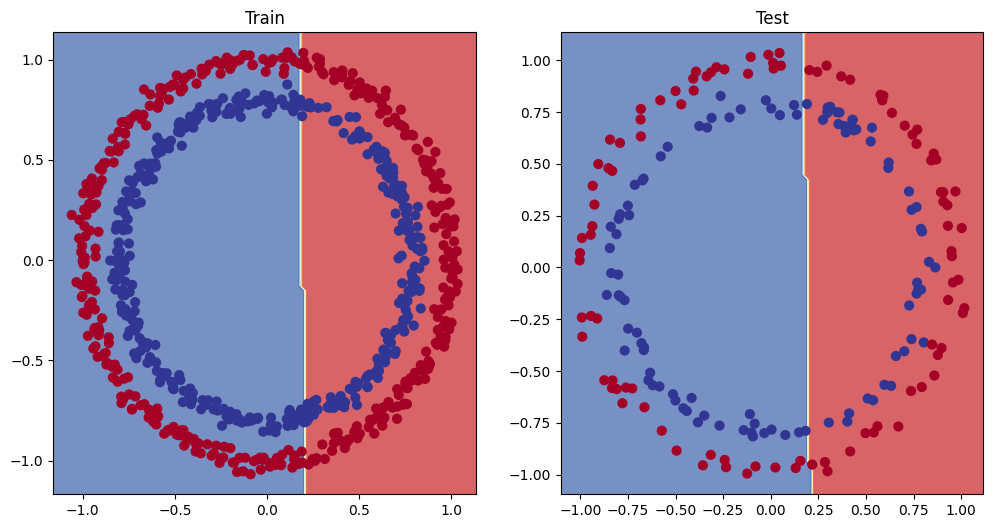

In [ ]:
# Plot the decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

Even though we added an additional hidden layer and additional neurons in our hidden layers , and increased the number of epochs over which our model is trained the accuracy is only about 50 is percent. Our model is performing nothing more than a coin toss !

## 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem

In [ ]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula (without epsilon)

# Check the data

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test split
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)


(80, 20, 80, 20)

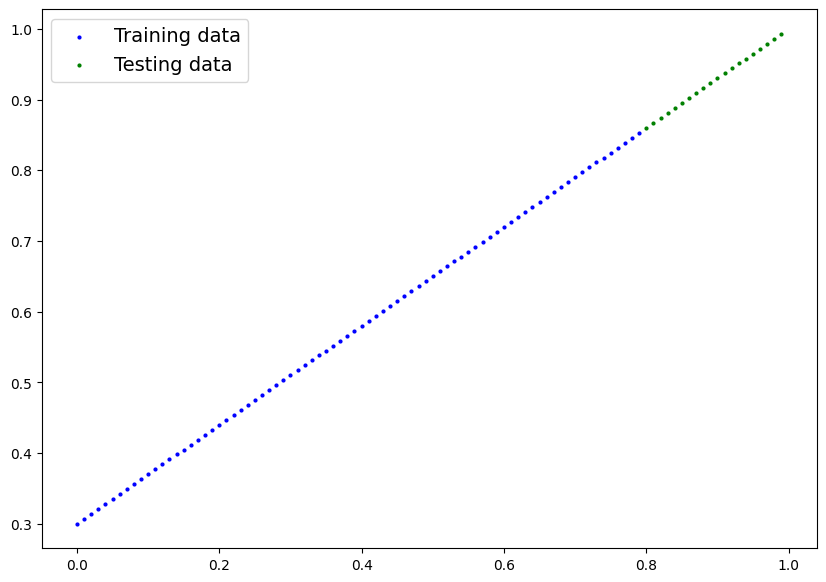

In [ ]:
plot_predictions(train_data=X_train_regression, train_labels=y_train_regression, test_data=X_test_regression, test_labels=y_test_regression)

## 5.2 Adjusting `model_1` to fit a straight line

We cannot directly use model_1 here because we had two input features in our previous dataset. This will cause errors , so we create a new model i.e model_2 by only changing the number of input features that the model accepts.

You might be wondering why we are creating model_2 ... We are simply trying to understand our model is missing. Both model_0 and model_1, tried to fit a linear line through our data , however this was nothing better than making predictions by doing a coin toss. Hence we created a data with a linear relationship and create a model_2 , purely to understand / illustrate how our model is useful to make predictions when there exists a linear relationship in the data.

In [ ]:
# Same architecture as model_1 ( but using nn.sequential())

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.1)


In [ ]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Put the data on the target device
X_train_regression, X_test_regression = X_train_regression.to(device), X_test_regression.to(device)
y_train_regression, y_test_regression = y_train_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  model_2.train()

  # 1. forward pass
  train_pred = model_2(X_train_regression)

  # 2. Calc loss
  train_loss = loss_fn(train_pred, y_train_regression)

  # 3. Optimize zero grad
  optimizer.zero_grad()

  # 4. Back prop
  train_loss.backward()

  # 5. gradient descent
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  if epoch % 100 == 0:
    print(f"Epoch : {epoch} | train loss : {train_loss:.5f} | test loss : {test_loss:.5f}")

Epoch : 0 | train loss : 0.75986 | test loss : 0.54143
Epoch : 100 | train loss : 0.09309 | test loss : 0.02901
Epoch : 200 | train loss : 0.07376 | test loss : 0.02850
Epoch : 300 | train loss : 0.06745 | test loss : 0.00615
Epoch : 400 | train loss : 0.06107 | test loss : 0.02004
Epoch : 500 | train loss : 0.05698 | test loss : 0.01061
Epoch : 600 | train loss : 0.04857 | test loss : 0.01326
Epoch : 700 | train loss : 0.06109 | test loss : 0.02127
Epoch : 800 | train loss : 0.05600 | test loss : 0.01425
Epoch : 900 | train loss : 0.05571 | test loss : 0.00603


In [ ]:
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

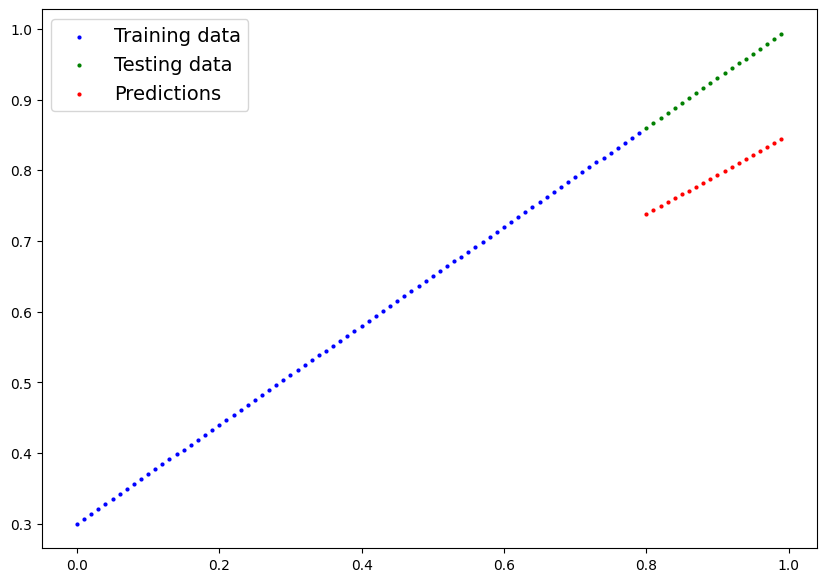

In [ ]:
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

# 6. The missing piece : non-linearity

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite) amount of linear and non-linear functions

## 6.1 Recreating non-linear data (red and blue circles)

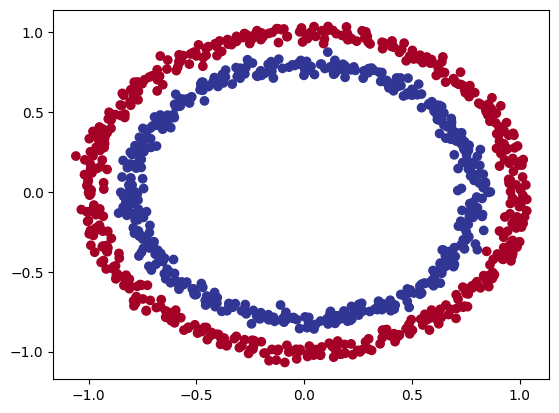

In [ ]:
# Make and plot data
# creating the same circles data we did at the beginning

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples=1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.RdYlBu)

In [ ]:
# Convert data to tensors and then to train and test splits

import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float) # make_circles uses NumPy by default
y = torch.from_numpy(y).type(torch.float)
# we are converting from numpy to PyTorch, because this way we can use AutoGrad which powers gradient descent ,
# we can also use GPU's by converting to torch tensor.

# Split into train and test sets
X_train, X_test ,y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

## 6.2 Building a model with non-linearity

* Linear = straight line
* Non-linear = non-straight lines (curves)

In [ ]:
# Build a model with non-linear activation functions

device = 'cuda' if torch.cuda.is_available() else 'cpu'

from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(lr=0.1,
                            params=model_3.parameters())

## 6.4 Training a model with non_linearity

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1500

X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

for epoch in range(epochs):
  # Training loop
  model_3.train()

  # 1. forward propagation
  train_logits = model_3(X_train).squeeze()
  train_preds = torch.round(torch.sigmoid(train_logits))

  # 2. Calculate the loss
  train_loss = loss_fn(train_logits,
                    y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=train_preds)

  # 3. optimize zero grad
  optimizer.zero_grad()

  # 4. Back prop
  train_loss.backward()

  # 5. Gradient descent
  optimizer.step()

  # Testing loop
  model_3.eval()
  with torch.inference_mode():
    # 1. forward prop
    test_logits = model_3(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss
    test_loss = loss_fn(test_logits,
                      y_test)
    test_acc = accuracy_fn(y_true=y_test,
                    y_pred=test_preds)

  if epoch % 100 == 0:
    print(f"Epoch : {epoch} | train loss : {train_loss:.2f} | train acc : {acc:.2f}% | test loss : {test_loss:.2f} | test acc : {test_acc:.2f}%")

Epoch : 0 | train loss : 0.69 | train acc : 50.00% | test loss : 0.69 | test acc : 50.00%
Epoch : 100 | train loss : 0.69 | train acc : 52.88% | test loss : 0.69 | test acc : 52.50%
Epoch : 200 | train loss : 0.69 | train acc : 53.37% | test loss : 0.69 | test acc : 55.00%
Epoch : 300 | train loss : 0.69 | train acc : 53.00% | test loss : 0.69 | test acc : 56.00%
Epoch : 400 | train loss : 0.69 | train acc : 52.75% | test loss : 0.68 | test acc : 56.50%
Epoch : 500 | train loss : 0.68 | train acc : 52.75% | test loss : 0.68 | test acc : 56.50%
Epoch : 600 | train loss : 0.68 | train acc : 54.50% | test loss : 0.67 | test acc : 56.00%
Epoch : 700 | train loss : 0.67 | train acc : 58.38% | test loss : 0.66 | test acc : 59.00%
Epoch : 800 | train loss : 0.65 | train acc : 64.00% | test loss : 0.65 | test acc : 67.50%
Epoch : 900 | train loss : 0.62 | train acc : 74.00% | test loss : 0.62 | test acc : 79.00%
Epoch : 1000 | train loss : 0.57 | train acc : 87.75% | test loss : 0.57 | test ac

## 6.5 Evaluating a model trained with non-linear activation functions

In [ ]:
model_3.eval()
with torch.inference_mode():
  test_logits = model_3(X_test).squeeze()
  test_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([[0.7379],
         [0.7434],
         [0.7490],
         [0.7546],
         [0.7602],
         [0.7657],
         [0.7713],
         [0.7769],
         [0.7825],
         [0.7880]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

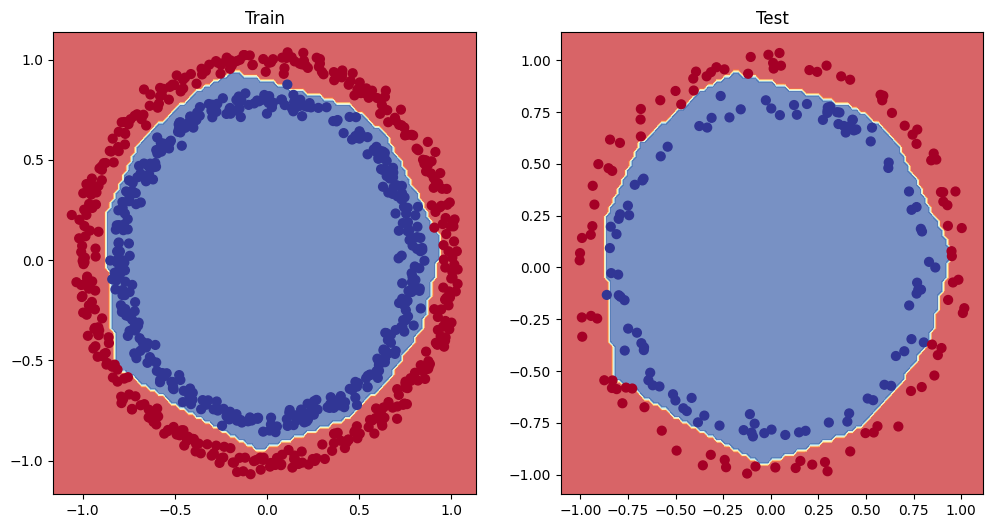

In [ ]:
# Plot the decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

# 7. Replicating Non-Linear Activation Functions

Neural networks , rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on it's own

And these tools are linear & non-linear functions.

In [ ]:
# Create a tensor

A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

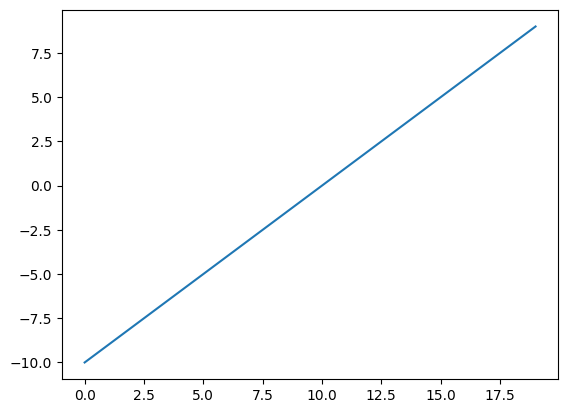

In [ ]:
# visualise this

plt.plot(A)

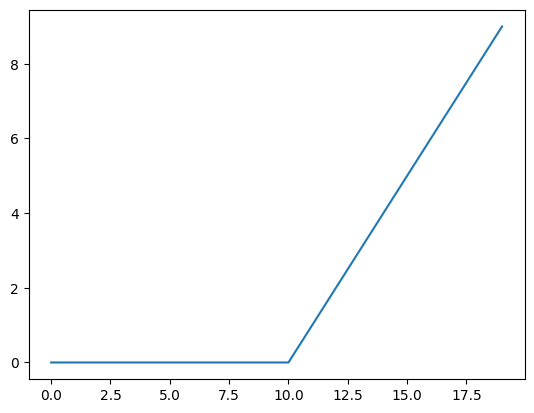

In [ ]:
plt.plot(torch.relu(A))

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])


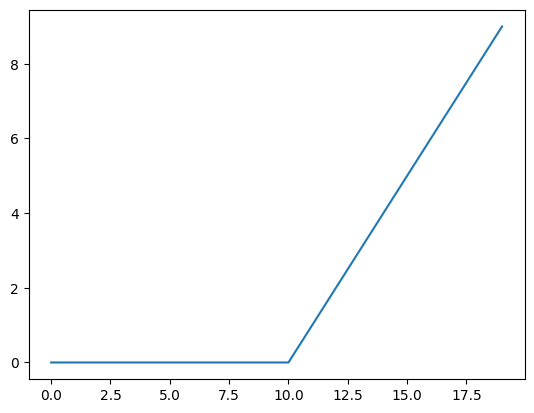

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

print(relu(A))
plt.plot(relu(A))

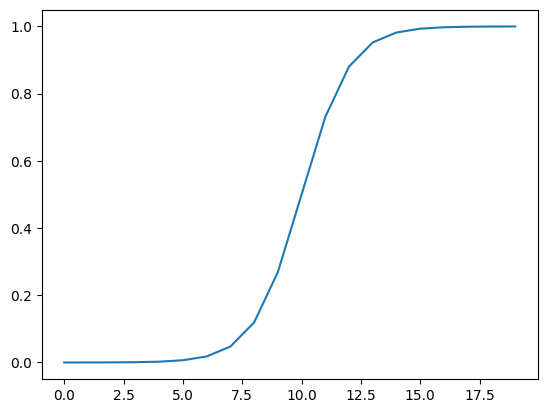

In [ ]:
# now let's do the same for sigmoid

def sigmoid(x: torch.Tensor) -> torch.Tensor:
  return 1 / (1 + torch.exp(-x))

plt.plot(sigmoid(A))

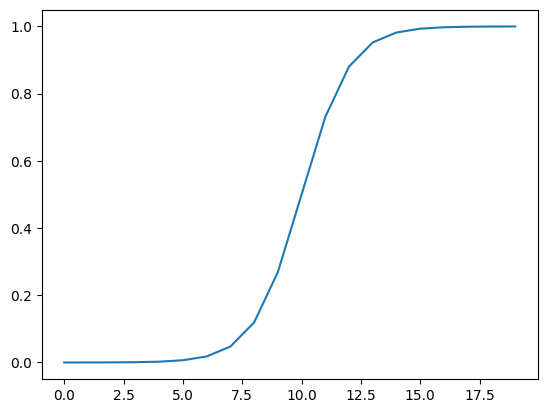

In [ ]:
plt.plot(torch.sigmoid(A))

**Note**: You can try to replicate the activation functions like we did with Sigmoid and ReLu.


You could write your functions for the activation functions but it's better to use the methods defined in PyTorch because they are tested already and use GPUs which makes the compute faster.

# 8. Multiclass Classification problem

* **Binary Classification** = one thing or another ( cat vs. dog , spam vs not spam, fraud or not fraud)
* **Multi-class classification** = more than one thing or another (cat vs. dog vs. chicken)

What could you draw if u had unlimited amount of straight (linear) and non-linear lines ?

We could draw pretty intricate patterns.




## 8.1 Creating a toy multi-class dataset

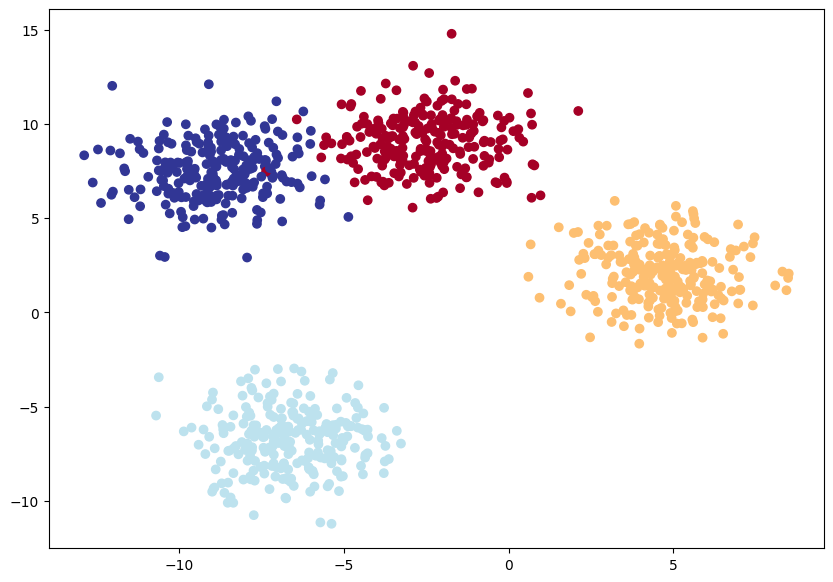

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
# The parameters to be set were obtained from the make_blobs sklearn doc

# most often some hyperparameters are capitalised when they are set at the start of a notebook,
# this denotes that these are some settings that can be changed
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob , y_blob = make_blobs(n_samples=1000,
                             n_features=NUM_FEATURES,
                             centers=NUM_CLASSES,
                             cluster_std=1.5, # Give the clusters a little shake up
                             random_state=RANDOM_SEED)

# 2. Sci-kit learn leverages NumPy , hence we need to convert our data to tensors
# Convert NumPy arrays to PyTorch tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)  # Convert features to float32 (PyTorch expects 32-bit floats)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)  # Convert labels to long integers (required for CrossEntropyLoss)

# Note: NumPy's default floating point dtype is float64, but PyTorch's operations generally expect float32,
# so we explicitly cast it. For the labels, PyTorch's CrossEntropyLoss expects the target tensor to have
# a dtype of LongTensor, which is why we convert it to that type. Initially, the dtype was set to float,
# causing an error because CrossEntropyLoss requires long integers for class labels.

# 3. Split data into train test split
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)
# 4. plot the data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap = plt.cm.RdYlBu)


## 8.2 Building a multi-class classification model in PyTorch

In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# Build a multi-class classification model

# Best practices for writing doc string - https://google.github.io/styleguide/pyguide.html
class BlobModel(nn.Module):
  def __init__(self, input_features , output_features, hidden_units = 8):
    """ Initializes multi-classs classification model.
    Args :
      input_features (int): Number of input features to the model
      output_features (int): Number of output features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8

    Returns :
      Object of class BlobModel , instantiated with the given input params

    Example :
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features = 2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_blob_train.shape, y_blob_train[:5]  # u can do this to determine the number of input features

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [ ]:
torch.unique(y_blob_train) # u can do this to determine the number of output features

tensor([0, 1, 2, 3])

## 8.3 Create a loss function and an optimizer for a multi-class classification model





Most commonly used loss function for a multiclass classification problem is the cross entropy loss function.
This criterion(Loss function is known as criterion in PyTorch) computes the cross entropy loss between input logits and target.

It is useful when training a classification problem with C classes. If provided, the optional argument weight should be a 1D Tensor assigning weight to each of the classes. **This is particularly useful when you have an unbalanced training set.**

In [ ]:
# Loss function measures how wrong our model's predictions are
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification - optimizer updates our models parameters to try and reduce the loss
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr = 0.1)

## 8.4 Getting Prediction probabilities for a multi class PyTorch Model

---
In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to predictiion probabilities and then to prediction labels.

Logits (raw outputs of the model) -> prediction probability (use `torch.softmax`) -> Prediction labels (take the argmax of the prediction probabilities)


In [ ]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10] # This denotes the raw output of our model i.e logits

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [ ]:
y_blob_test[:10] # This is the actual output

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

We can see that the predicted output (y_logits) is our models raw output i.e logits , but the actual output is in the form of labels hence we need to convert the logits to prediction probabilities and then to prediction labels.

In [ ]:
# Convert our model's lo
y_pred_probs = torch.softmax(y_logits, dim = 1)
print(y_logits[:5])
print(y_pred_probs[:5]) # These are prediction probabilities

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [ ]:
torch.sum(y_pred_probs[0])

tensor(1.0000)

In [ ]:
torch.max(y_pred_probs[0])

tensor(0.3244)

The `y_pred_probs` represents the predicted probability distribution for each input, obtained by applying the softmax activation function to the logits. This transformation converts the raw model outputs (logits) into probabilities, indicating the likelihood of each class being the correct classification.

In [ ]:
torch.argmax(y_pred_probs[0]) # Converting the model's prediction probabilities to prediction labels

tensor(1)

In [ ]:
# Converting the model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

Therefore , we obtained the prediction labels.

## 8.5 Creating a  training loop and testing loop for a multi-class PyTorch model

In [ ]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put the data to the target device

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  ## Training
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ## Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim = 1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"Epoch : {epoch} | Loss : {loss:.4f} | Accuracy : {acc:.2f}% | Test loss : {test_loss:.4f} | Test acc : {test_acc:.2f}%")

Epoch : 0 | Loss : 1.1588 | Accuracy : 40.38% | Test loss : 1.0755 | Test acc : 48.00%
Epoch : 10 | Loss : 0.6448 | Accuracy : 96.75% | Test loss : 0.6607 | Test acc : 97.50%
Epoch : 20 | Loss : 0.4254 | Accuracy : 98.50% | Test loss : 0.4307 | Test acc : 100.00%
Epoch : 30 | Loss : 0.2529 | Accuracy : 99.12% | Test loss : 0.2451 | Test acc : 99.50%
Epoch : 40 | Loss : 0.1123 | Accuracy : 99.25% | Test loss : 0.1023 | Test acc : 99.50%
Epoch : 50 | Loss : 0.0663 | Accuracy : 99.25% | Test loss : 0.0585 | Test acc : 99.50%
Epoch : 60 | Loss : 0.0507 | Accuracy : 99.25% | Test loss : 0.0429 | Test acc : 99.50%
Epoch : 70 | Loss : 0.0430 | Accuracy : 99.25% | Test loss : 0.0349 | Test acc : 99.50%
Epoch : 80 | Loss : 0.0384 | Accuracy : 99.25% | Test loss : 0.0299 | Test acc : 99.50%
Epoch : 90 | Loss : 0.0352 | Accuracy : 99.25% | Test loss : 0.0266 | Test acc : 99.50%


## 8.6 Making and evaluating predictions with a PyTorch Multi-Class Model

In [ ]:
# Make Predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [ ]:
# Go from logits to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_probs[:10]

tensor([[1.3437e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5997e-05, 2.7210e-04]])

In [ ]:
# Go from prediction probabilities to prediction labels

y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

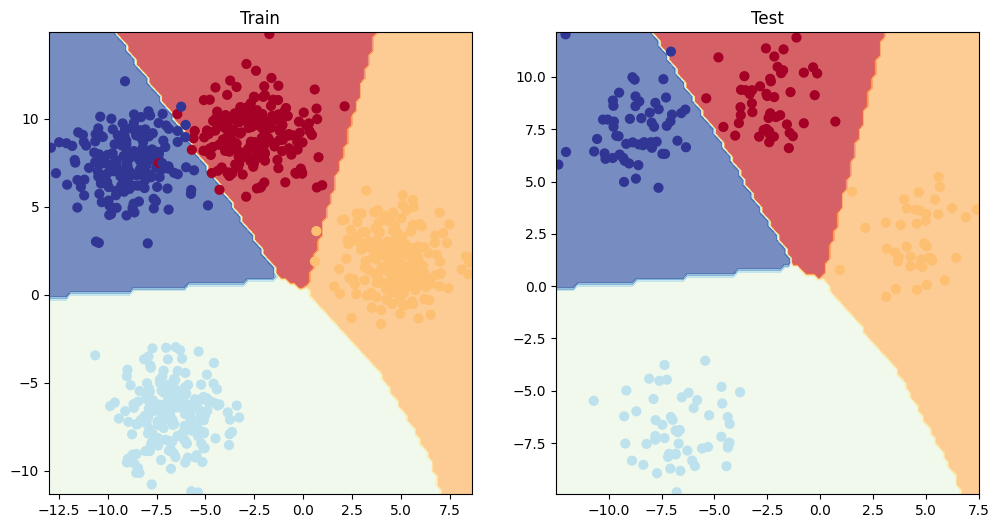

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

Even if we remove the `Relu()` activation function, effectively eliminating the non-linearity from the model, it wouldn't necessarily impact the model's performance in some cases. However, there are certain scenarios where both linear and non-linear components are essential for achieving optimal results.

# 9. A Few More classification metrics ... (To Evaluate our classification model)

* Accuracy - out of 100 samples, how many does our model get right ?
* Precision
* Recall
* F1-score - combination of precision and recall
* Confusion Matrix
* Classification Report

Precision and Recall are useful when we have an imbalanced dataset.

See this article for when to use precision/recall - https://willkoehrsen.github.io/statistics/learning/beyond-accuracy-precision-and-recall/

Checkout precision recall tradeoff , there are use cases where higher precision is necessary (lesser false positive) and cases where higher recall is necessary (lesser false negatives) , this depends upon the use case.

If you want access to a lot of PyTorch metrics , see TorchMetrics - https://lightning.ai/docs/torchmetrics/stable/


In [ ]:
!pip install torchmetrics

In [ ]:
from torchmetrics import Accuracy

# Setup Metric
# NOTE : Ensure ur metrics are on the same device as the data
torchmetric_acc = Accuracy(task="multiclass", num_classes=4).to(device)

# Calculate accuracy
torchmetric_acc(y_preds, y_blob_test)

tensor(0.9950)